In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
# list the info of load_iris
for index, (name, content) in enumerate(iris.items()):
    try:
        print(name, ':')
        print(content.shape)
    except:
        print(content)

data :
(150, 4)
target :
(150,)
target_names :
(3,)
DESCR :
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== 

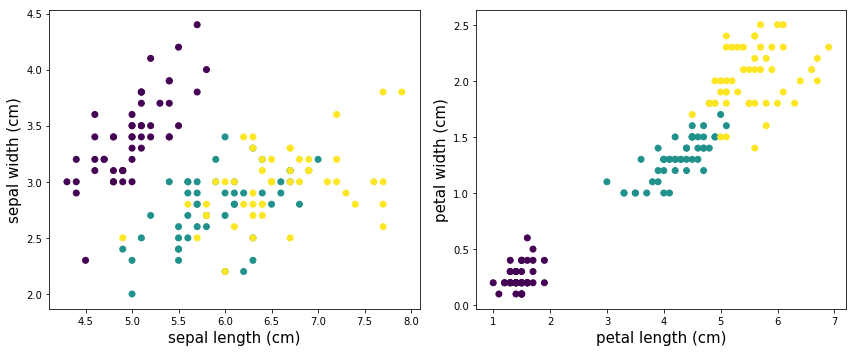

In [3]:
# plot the distribution of iris
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1], c = y)
plt.xlabel('sepal length (cm)', fontsize = 15)
plt.ylabel('sepal width (cm)', fontsize = 15)
plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3], c = y)
plt.xlabel('petal length (cm)', fontsize = 15)
plt.ylabel('petal width (cm)', fontsize = 15)
plt.tight_layout()
plt.show()

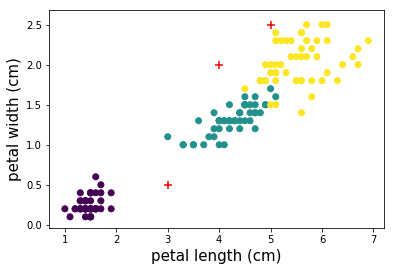

In [4]:
# we select petal features to do the K-means algorithm
# here we define initial three cluster centriods
#μ = np.array([[1,1],[4,1.5],[6,1.5]])
μ = np.array([[3,0.5],[4,2],[5,2.5]])
plt.scatter(X[:,2],X[:,3], c = y)
plt.xlabel('petal length (cm)', fontsize = 15)
plt.ylabel('petal width (cm)', fontsize = 15)
plt.scatter(μ[:,0],μ[:,1], marker = '+', s = 80, c = 'r')
plt.show()

In [5]:
# define a distance fun
def d(a,b):
    return np.sqrt(np.sum((a-b)**2))

# define a fun to assign a datum to it's corresponding class
def assign(μ, X):
    distance_set = []
    for i in range(np.size(μ,0)):
        distance = d(μ[i,:],X)
        distance_set += [distance]
    return np.argmin(distance_set)


0.20925172649572643


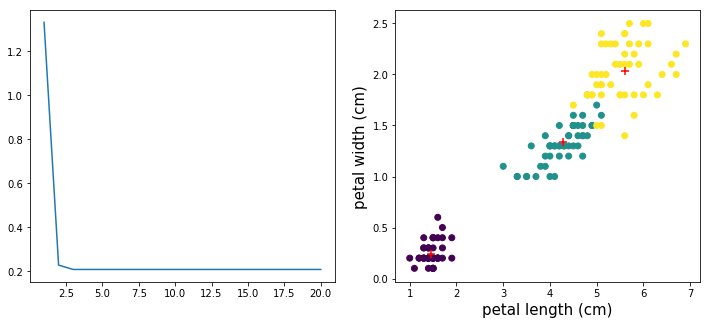

In [6]:
# start the K-Means
global C, J, cos
J = []
n_step = 20

for k in range(n_step):
    C = [] # assigned-class set
    cos = 0 # cost fun
    # step1: to assian all data to their corresponding class
    for i in range(len(X)):
        ci = assign(μ, X[i,2:]) # we only care about petal features
        C += [ci] 
        cos += ((d(X[i,2:],μ[ci,:]))**2)/len(X)
    J += [cos]
    # step2: Use Pandas to process data
    df1 = pd.DataFrame(X[:,2:], columns = ['petal length (cm)', 'petal width (cm)'])
    df2 = pd.DataFrame(C, columns= ['Class Assignment'])
    df = pd.concat([df1,df2], axis = 1)

    # step3: update the μ1, μ2, μ3. i.e. μ matrix
    for j in range(np.size(μ,0)):
        mean = df.loc[df['Class Assignment'] == j].mean()
        x1, x2 = mean[0], mean[1]
        μ[j,:] = np.array([x1,x2])
    #print(μ)
print(cos)
#print(C)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,len(J)+1), J)
plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3], c = y)
plt.xlabel('petal length (cm)', fontsize = 15)
plt.ylabel('petal width (cm)', fontsize = 15)
plt.scatter(μ[:,0],μ[:,1], marker = '+', s = 80, c = 'r')
plt.show()

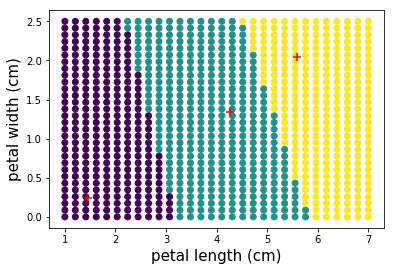

In [14]:
# predict all points on petal plane
x_arr, y_arr = np.meshgrid(np.linspace(1,7,30),np.linspace(0,2.5,30))
X_pre = np.c_[x_arr.ravel(), y_arr.ravel()]

Y_pre = []
for m in range(len(X_pre)):
    Y_pre += [assign(μ, X_pre[m,:])]

plt.scatter(X_pre[:,0],X_pre[:,1], c = Y_pre)
plt.xlabel('petal length (cm)', fontsize = 15)
plt.ylabel('petal width (cm)', fontsize = 15)
plt.scatter(μ[:,0],μ[:,1], marker = '+', s = 80, c = 'r')
plt.show()